img_size [384, 512]


Using cache found in /home/bjangley/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt


Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt" to /home/bjangley/.cache/torch/hub/checkpoints/ZoeD_M12_NK.pt
100%|██████████| 1.35G/1.35G [00:21<00:00, 68.9MB/s]


Loaded successfully
img_size [384, 512]


Using cache found in /home/bjangley/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


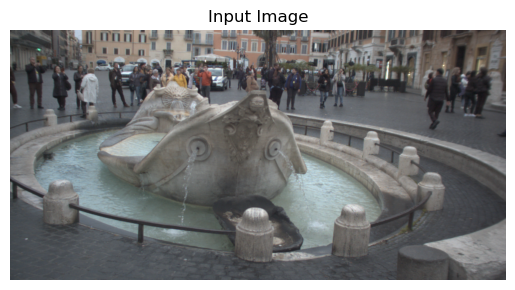

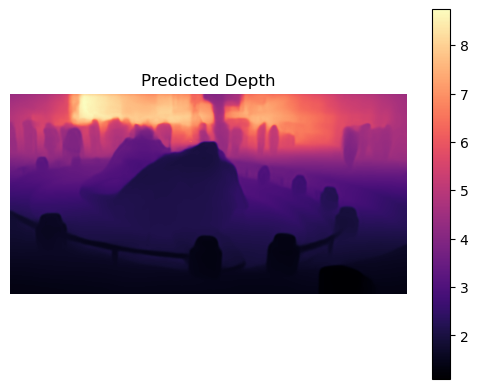

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Manual model loading (from local repo)
from zoedepth.models.builder import build_model
from zoedepth.utils.config import get_config
import torch 

# conf = get_config("zoedepth", "infer", config_version="kitti")
# ZoeD_NK
conf = get_config("zoedepth_nk", "infer")
model_zoe_nk = build_model(conf)
zoe = build_model(conf)
DEVICE = "cuda:6" if torch.cuda.is_available() else "cpu"
zoe = zoe.to(DEVICE)

# Load and display the image
image = Image.open("/datasets/vbr_slam/spagna/spagna_train0_kitti/camera_left/data/0000009781.png").convert("RGB")
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')
plt.show()

# Predict depth as numpy
depth_numpy = zoe.infer_pil(image)

# Display as grayscale (depth)
plt.imshow(depth_numpy, cmap='magma')
plt.title("Predicted Depth")
plt.axis('off')
plt.colorbar(plt.imshow(depth_numpy, cmap='magma'), ax=plt.gca())

plt.show()


In [2]:
print(depth_numpy.shape)

(700, 1388)
